# Przygotowanie Danych

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
datContent = pd.read_csv("data//grafana_data_export.csv", delimiter=';')

In [165]:
datContent.head()

,Series,Time,Value
0,clab2189node18,2020-06-15T21:00:00+02:00,13.470261
1,clab2189node18,2020-06-15T21:20:00+02:00,14.522368
2,clab2189node18,2020-06-15T21:40:00+02:00,15.279718
3,clab2189node18,2020-06-15T22:00:00+02:00,14.351735
4,clab2189node18,2020-06-15T22:20:00+02:00,20.885126


In [166]:
datContent.Series.unique()

array(['clab2189node18', 'clab2189node19', 'clab2189node20',
       'clab2189node21'], dtype=object)

In [167]:
datContent.shape

(2020, 3)

In [168]:
datContent.count()

Series    2020
Time      2020
Value     2020
dtype: int64

In [169]:
pd.Series(datContent['Time']).is_unique

False

In [170]:
print(datContent['Series'][0], datContent['Time'][0])
print(datContent['Series'][(1 * (datContent.shape[0] // 4)) - 1], datContent['Time'][(1 * (datContent.shape[0] // 4)) - 1])
print('---')

print(datContent['Series'][(1 * (datContent.shape[0] // 4))], datContent['Time'][(1 * (datContent.shape[0] // 4))])
print(datContent['Series'][(2 * (datContent.shape[0] // 4)) - 1], datContent['Time'][(2 * (datContent.shape[0] // 4)) - 1])
print('---')

print(datContent['Series'][(2 * (datContent.shape[0] // 4))], datContent['Time'][(2 * (datContent.shape[0] // 4))])
print(datContent['Series'][(3 * (datContent.shape[0] // 4)) - 1], datContent['Time'][(3 * (datContent.shape[0] // 4)) - 1])
print('---')

print(datContent['Series'][(3 * (datContent.shape[0] // 4))], datContent['Time'][(3 * (datContent.shape[0] // 4))])
print(datContent['Series'][(4 * (datContent.shape[0] // 4)) - 1], datContent['Time'][(4 * (datContent.shape[0] // 4)) - 1])

clab2189node18 2020-06-15T21:00:00+02:00
clab2189node18 2020-06-22T21:00:00+02:00
---
clab2189node19 2020-06-15T21:00:00+02:00
clab2189node19 2020-06-22T21:00:00+02:00
---
clab2189node20 2020-06-15T21:00:00+02:00
clab2189node20 2020-06-22T21:00:00+02:00
---
clab2189node21 2020-06-15T21:00:00+02:00
clab2189node21 2020-06-22T21:00:00+02:00


In [171]:
print(datContent['Series'][0] == datContent['Series'][(1 * (datContent.shape[0] // 4)) - 1])
print(datContent['Series'][(1 * (datContent.shape[0] // 4))] == datContent['Series'][(2 * (datContent.shape[0] // 4)) - 1])
print(datContent['Series'][(2 * (datContent.shape[0] // 4))] == datContent['Series'][(3 * (datContent.shape[0] // 4)) - 1])
print(datContent['Series'][(3 * (datContent.shape[0] // 4))] == datContent['Series'][(4 * (datContent.shape[0] // 4)) - 1])

print(datContent['Time'][0] == datContent['Time'][(1 * (datContent.shape[0] // 4))] == datContent['Time'][(2 * (datContent.shape[0] // 4))] == datContent['Time'][(3 * (datContent.shape[0] // 4))])
print(datContent['Time'][(1 * (datContent.shape[0] // 4)) - 1] == datContent['Time'][(2 * (datContent.shape[0] // 4)) - 1] == datContent['Time'][(3 * (datContent.shape[0] // 4)) - 1] == datContent['Time'][(4 * (datContent.shape[0] // 4)) - 1])

True
True
True
True
True
True


In [172]:
# drop Time

d = {
    'Time': list(range((1 * (datContent.shape[0] // 4)) - 1)),
    'clab2189node18': datContent['Value'][0:(1 * (datContent.shape[0] // 4)) - 1].reset_index(drop=True),
    'clab2189node19': datContent['Value'][(1 * (datContent.shape[0] // 4)):(2 * (datContent.shape[0] // 4)) - 1].reset_index(drop=True),
    'clab2189node20': datContent['Value'][(2 * (datContent.shape[0] // 4)):(3 * (datContent.shape[0] // 4)) - 1].reset_index(drop=True),
    'clab2189node21': datContent['Value'][(3 * (datContent.shape[0] // 4)):(4 * (datContent.shape[0] // 4)) - 1].reset_index(drop=True)
}


data = pd.DataFrame(d)

In [173]:
data.head()

,Time,clab2189node18,clab2189node19,clab2189node20,clab2189node21
0,0,13.470261,12.497104,12.307692,11.789692
1,1,14.522368,13.422947,12.191719,14.515398
2,2,15.279718,13.696577,11.852457,15.019536
3,3,14.351735,12.411655,11.235736,15.275737
4,4,20.885126,17.919341,16.487906,19.697467


# Wykres!

In [174]:
def plot_data(data, num):
    x = data['Time'].values.tolist()
    if num in [18, 19, 20, 21]:
        y = data['clab2189node' + str(num)].values.tolist()
        plt.figure(figsize=(20,5))
        plt.scatter(x, y, color = 'magenta')
        plt.plot(x, y, color = 'green')
        plt.title(f'Zużycie CPU dla node {num}')
    else:
        y1 = data['clab2189node18'].values.tolist()
        y2 = data['clab2189node19'].values.tolist()
        y3 = data['clab2189node20'].values.tolist()
        y4 = data['clab2189node21'].values.tolist()
        plt.figure(figsize=(20,5))
        plt.plot(x, y1)
        plt.plot(x, y2)
        plt.plot(x, y3)
        plt.plot(x, y4)
        plt.title(f'Zużycie CPU dla wszystkich')
    plt.xlabel('Czas')
    plt.ylabel('Zużycie CPU')
    plt.show()

In [175]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 5 columns):
Time              504 non-null int64
clab2189node18    504 non-null float64
clab2189node19    504 non-null float64
clab2189node20    504 non-null float64
clab2189node21    504 non-null float64
dtypes: float64(4), int64(1)
memory usage: 19.8 KB


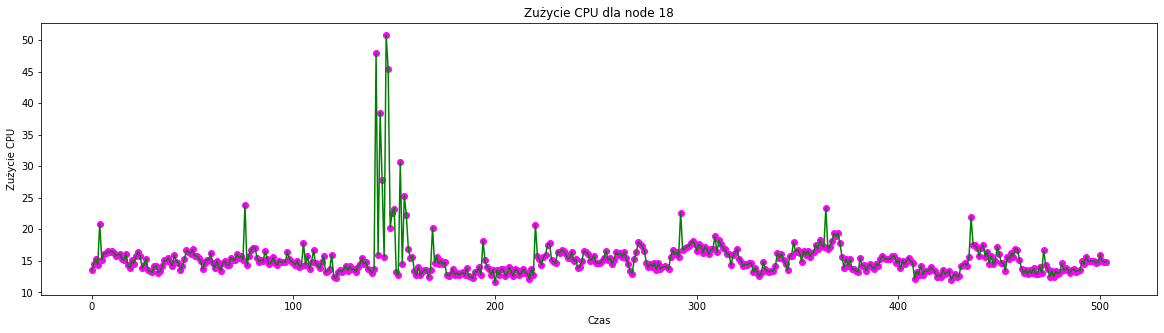

In [176]:
plot_data(data, num=18)

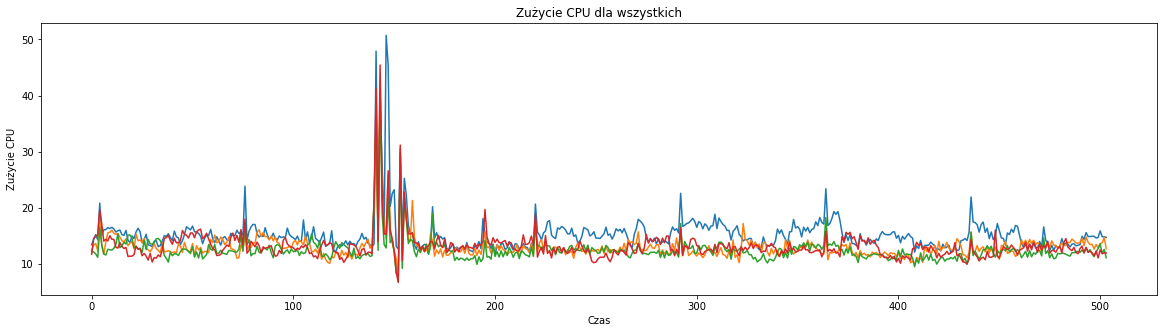

In [177]:
plot_data(data, num=False)

# Model regresji

In [178]:
# dane "czasowe"
X = data.iloc[:,0:1].values.astype(float)

# dane wartości
y_node18 = data.iloc[:,1:2].values.astype(float)
y_node19 = data.iloc[:,2:3].values.astype(float)
y_node20 = data.iloc[:,3:4].values.astype(float)
y_node21 = data.iloc[:,4:5].values.astype(float)

In [179]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y_node18 = sc_y.fit_transform(y_node18)
y_node19 = sc_y.fit_transform(y_node19)
y_node20 = sc_y.fit_transform(y_node20)
y_node21 = sc_y.fit_transform(y_node21)

In [180]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X, y_node18.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
'''
Podzielić dane na testowe i treningowe

zrobić walidacje krzyżową i policzyc statystyki

wykresy!
'''